In [1]:
from pathlib import Path
from geecs_data_utils import ScanData
from image_analysis.data_1d_utils import read_1d_data, Data1DType, Data1DConfig
import matplotlib.pyplot as plt

2025-10-08 21:02:53,039 - geecs_data_utils.geecs_paths_config - WARNING - Z:/data path was not found


In [9]:
sd = ScanData.from_date(year=2025, month=8, day=7, number=7, experiment="Undulator")
dev_name = "Z_Test_Scope"

# create expected path
file_path = sd.paths.get_device_shot_path(
    tag=sd.paths.get_tag(), device_name=dev_name, shot_number=2, file_extension="dat"
)
cfg = Data1DConfig(data_type=Data1DType.TEK_SCOPE_HDF5, trace_index=0)
result = read_1d_data(file_path, config=cfg)

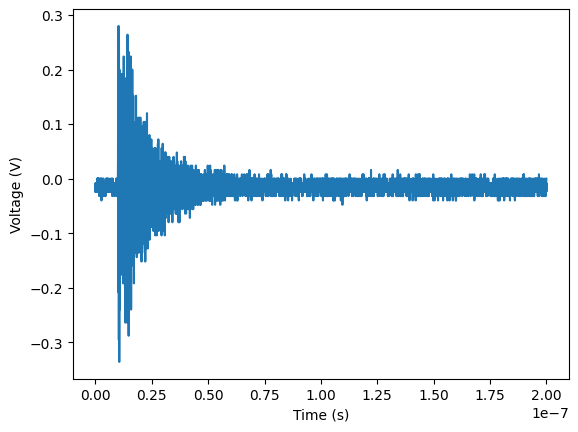

In [3]:
plt.plot(result.data[:, 0], result.data[:, 1])
plt.xlabel(f"{result.x_label} ({result.x_units})")
plt.ylabel(f"{result.y_label} ({result.y_units})")
plt.show()

In [4]:
sd = ScanData.from_date(year=2025, month=9, day=24, number=10, experiment="Undulator")

dev_name = "U_BCaveMagSpec-interpSpec"

# MagSpec stitcher interpSpec data does not adhere to the standard file path convention, so
# extra effort is needed to construct a file path
file_path = Path(sd.data_frame[f"{dev_name}_expected_path"][1]).parent
file_path = file_path / "Scan010_U_BCaveMagSpec_001.txt"

cfg = Data1DConfig(data_type=Data1DType.TSV, x_column=0, y_column=1)
result = read_1d_data(file_path, config=cfg)

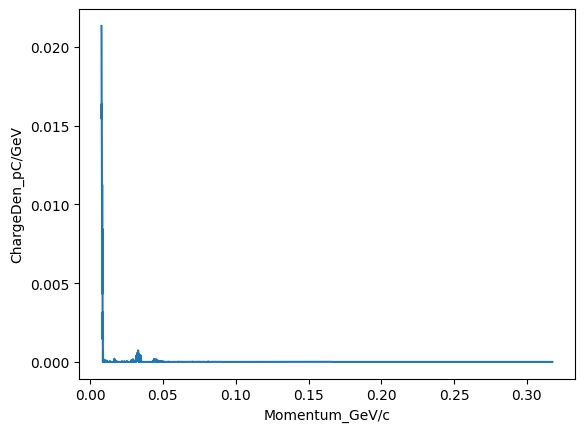

In [5]:
plt.plot(result.data[:, 0], result.data[:, 1])
plt.xlabel(f"{result.x_label}")
plt.ylabel(f"{result.y_label}")
plt.show()

In [6]:
dev_name = "U_BCaveICT"

# default expected path is .png...
file_path = Path(sd.data_frame[f"{dev_name}_expected_path"][5]).with_suffix(".tdms")

cfg = Data1DConfig(data_type=Data1DType.TDMS_SCOPE, trace_index=0)
result = read_1d_data(file_path, config=cfg)

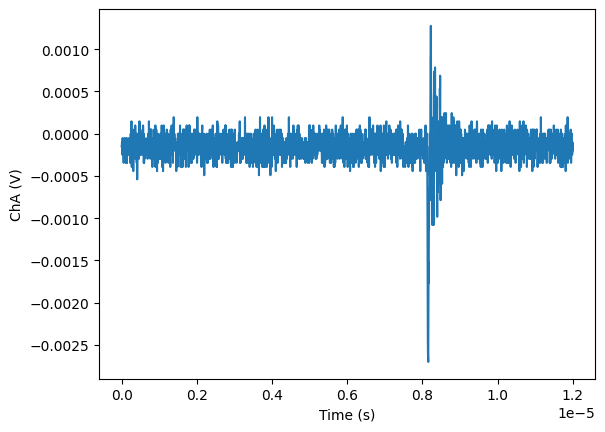

In [7]:
plt.plot(result.data[:, 0], result.data[:, 1])
plt.xlabel(f"{result.x_label} ({result.x_units})")
plt.ylabel(f"{result.y_label} ({result.y_units})")
plt.show()